<a href="https://colab.research.google.com/github/barauna-lo/Colored_Noise/blob/main/RNN_For_1D_Colored_Noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librarys

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import tensorflow as tf

from keras import Sequential
from keras.layers import Conv2D, Flatten, Dense, LSTM, GRU, RNN,SimpleRNN
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
#from datetime import datetime # for put the time info in each plot          #https://stackoverflow.com/questions/415511/how-to-get-the-current-time-in-python
import time as time

## Downloading data

In [ ]:
#Monting Google Drive
#https://medium.com/analyatics-vidhya/how-to-download-kaggle-datasets-into-google-colab-via-google-drive-dcb348d7af07
from google.colab import drive
drive.mount('/content/drive')
#Importing and conifg the Kaggle Drive
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"
# Acessing the folder
%cd /content/drive/MyDrive/Kaggle/
# Dowloading NASA data-set
!kaggle datasets download -d luanorionbarana/synthetic-colored-noise
#Unziping data-set
!unzip "synthetic-colored-noise.zip" -d "/content/"

Mounted at /content/drive
/content/drive/MyDrive/Kaggle
100% 1.16G/1.16G [00:09<00:00, 131MB/s]
100% 1.16G/1.16G [00:09<00:00, 133MB/s]
Archive:  synthetic-colored-noise.zip
  inflating: /content/color.csv      
  inflating: /content/color.plk      
  inflating: /content/color_4series.plk  


In [ ]:
# #Retorning to Sample folder! NOT NECESSERY
%cd ..
%cd ..
%cd ..

/content/drive/MyDrive
/content/drive
/content


In [ ]:
df = pd.read_pickle('color_4series.plk')

## Ploting

In [ ]:
index = [0,4,9]

Text(0, 0.5, 'Amplitude')

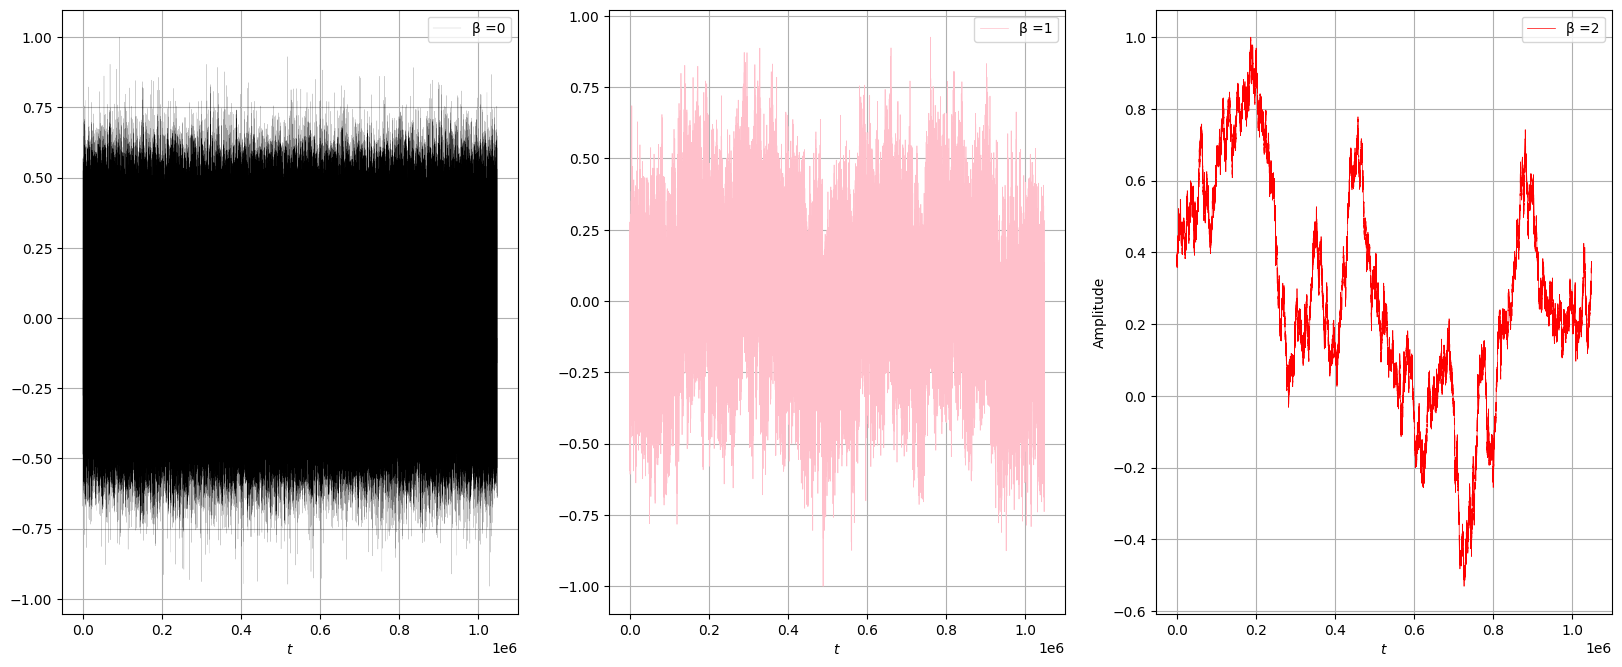

In [ ]:
color = ['black','pink','red']
linewidth = [0.07,0.5,.5]
plt.figure(figsize=(20,8),dpi=100)
for i in range(len(index)):
  plt.subplot(1,3,i+1)
  plt.plot(df.Series[index[i]][:],label='β ='+str(df.beta[index[i]]),color=color[i],linewidth=linewidth[i])
  plt.grid()
  plt.legend()
  plt.xlabel('$t$')
plt.ylabel('Amplitude')
  #plt.title(color[i]+ ' noise')
#plt.suptitle('Colored Noise')


# Pre-processing

In [22]:
#serie_index = 0  #white Noise
#serie_index = 40 #pink noise
serie_index =  9#red Noise

min_size , max_size = 0 , len(df.Series[0])

dataframe = pd.DataFrame({"Serie":df['Series'][serie_index][min_size:max_size]})
dataset = dataframe.values.astype('float32')
beta = str(df['beta'][serie_index])

In [23]:
# definindo as amostras de treinamento e teste segundo o hold-out.
train_size = int(len(dataset) * 0.50)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
#val_size = 5000
#train, test, val = dataset[0:train_size,:], dataset[train_size:len(dataset),:], dataset[len(dataset):len(dataset)+val_size,:]

In [24]:
# conversão da série temporal em uma matriz de atributos para regressão
def create_dataset(dataset, look_back=10):
	'''
  This function will contain two vectors, dataX and dataY, the dataX will contain a set of numbers within the time series
  and the dataY will be its posterior value
  For example:
  list = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
  if the look_back is equal to 3 we will have
  dataX[0] = [0,1,2] ; dataY[0] = [3]
  dataX[1] = [1,2,3] ; dataY[1] = [4]
  dataX[2] = [2,3,4] ; dataY[2] = [5]
  dataX[3] = [3,4,5] ; dataY[3] = [6]
	'''
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [25]:
look_back = 1000

trainX, trainY = create_dataset(train, look_back)
testX, testY   = create_dataset(test,  look_back)
#valX, valY     = create_dataset(val,   look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX,(trainX.shape[0],1, trainX.shape[1]))
testX =  np.reshape(testX, (testX.shape[0],1, testX.shape[1]))
#valX =   np.reshape(valX,  (valX.shape[0],  1, valX.shape[1]))

# Model

In [26]:
#Setting Random seeds🌱
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(3)

In [27]:
star = time.time()
#Paramenters 
epochs = 50
batch_size = look_back*10
#batch_size = len(trainX)# 
n_1 = int(look_back*1e0)
n_2 = int(look_back*1e0)
n_3 = int(look_back*1e0)
n_4 = int(look_back*1e0)

In [ ]:
star_RNN = time.time()
model_RNN = Sequential()
model_RNN.add(SimpleRNN(n_1, return_sequences=True,input_shape=(1,look_back)))
model_RNN.add(SimpleRNN(n_2, return_sequences=True))
model_RNN.add(SimpleRNN(n_3, return_sequences=True))
model_RNN.add(SimpleRNN(n_4))
model_RNN.add(Dense(1))
model_RNN.compile(loss='mean_squared_error', optimizer='adam',metrics=['mse'])
history_RNN = model_RNN.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, verbose=0,validation_split=0.7)
model_RNN.save('model_RNN')
time_RNN = time.time()

In [ ]:
star_LSTM = time.time()
model_LSTM = Sequential()
model_LSTM.add(LSTM(n_1, return_sequences=True,input_shape=(1,look_back)))
model_LSTM.add(LSTM(n_2, return_sequences=True))
model_LSTM.add(LSTM(n_3, return_sequences=True))
model_LSTM.add(LSTM(n_4))
model_LSTM.add(Dense(1))
model_LSTM.compile(loss='mean_squared_error', optimizer='adam',metrics=['mse'])
history_LSTM = model_LSTM.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, verbose=1,validation_split=0.7)
time_LSTM = time.time()
model_LSTM.save('model_LSTM')
time_RNN = time.time()
!zip -r /content/drive/MyDrive/Kaggle/model_LSTM.zip /content/model_LSTM/

Epoch 1/50
16/16 [==============================] - 1005s 64s/step - loss: 0.0894 - mse: 0.0894 - val_loss: 0.0265 - val_mse: 0.0265
Epoch 2/50
16/16 [==============================] - 1017s 65s/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 3/50
16/16 [==============================] - 1007s 65s/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 4/50
16/16 [==============================] - 999s 64s/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 5/50
16/16 [==============================] - 1031s 66s/step - loss: 7.4254e-04 - mse: 7.4254e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 6/50
16/16 [==============================] - 1015s 65s/step - loss: 4.5373e-04 - mse: 4.5373e-04 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 7/50
11/16 [===================>..........] - ETA: 2:59 - loss: 3.4930e-04 - mse: 3.4930e-04

In [ ]:
star_GRU = time.time()
model_GRU = Sequential()
model_GRU.add(GRU(n_1, return_sequences=True,input_shape=(1,look_back)))
model_GRU.add(GRU(n_2, return_sequences=True))
model_GRU.add(GRU(n_3, return_sequences=True))
model_GRU.add(GRU(n_4))
model_GRU.add(Dense(1))
model_GRU.compile(loss='mean_squared_error', optimizer='adam',metrics=['mse'])
history_GRU = model_GRU.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, verbose=1,validation_split=0.7)
time_GRU = time.time()
model_RNN.save('model_LSTM')
!zip -r /content/drive/MyDrive/Kaggle/model_GRU.zip /content/model_GRU/

In [ ]:
#Alocationg all the models in vectors!

model = [model_RNN,model_LSTM,model_GRU]
history = [history_RNN,history_LSTM,history_GRU]
model_name = ['Simple RNN','LSTM','GRU']
color = ['C0','C1','C2']

#Allocating metrics
loss, mse, val_loss =[],[],[]
for i in range(len(model)):
  loss.append(history[i].history['loss'])
  mse.append(history[i].history['mse'])
  val_loss.append(history[i].history['val_loss'])

In [ ]:
model[1].summary()

In [ ]:
star_RNN = star

In [ ]:



Time =[round((time_RNN - star_RNN)/60,5), round((time_LSTM - star_LSTM)/60,5), round((time_GRU - star_GRU)/60,5)]
for i in range (len(Time)):  print(model_name[i],Time[i],'minutus') if Time[i] < 100 else print(model_name[i],round(Time[i]/60,4),'hours')

# Results

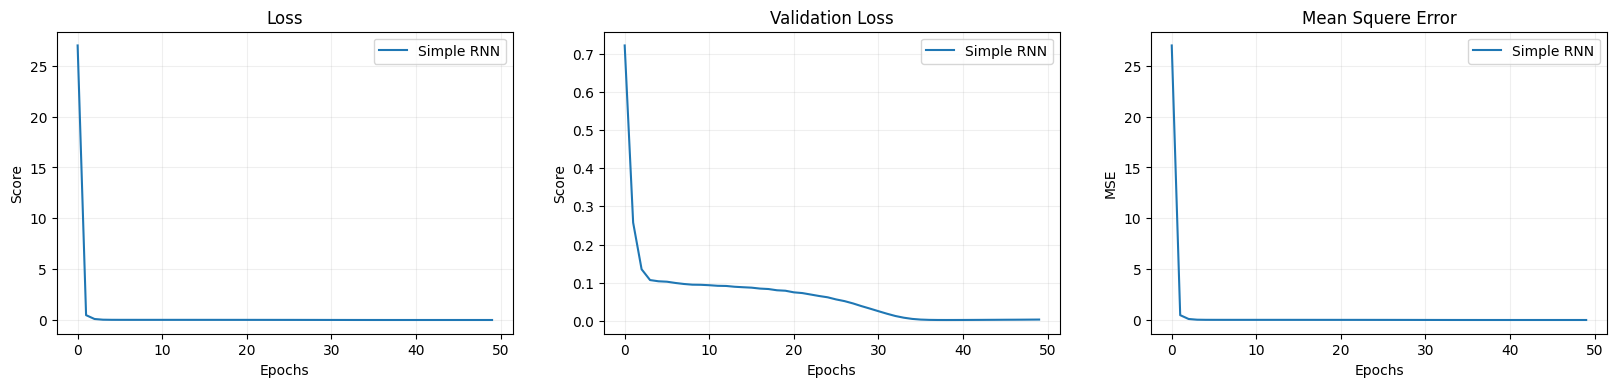

In [20]:
epochs = np.arange(0,len(loss[0]))
plt.figure(figsize=(20, 4),dpi=100)

plt.subplot(1,3,1)
for i in range(len(model)): plt.plot(epochs,loss[i], label=model_name[i],  color=color[i], linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.legend()
plt.title('Loss')
#plt.ylim(-0.01,0.2)
plt.grid(alpha=0.2)

plt.subplot(1,3,2)
for i in range(len(model)): plt.plot(epochs,val_loss[i], label=model_name[i],  color=color[i], linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.legend()
plt.title('Validation Loss')
#plt.ylim(-0.01,0.13)
plt.grid(alpha=0.2)


plt.subplot(1,3,3)
for i in range(len(model)): plt.plot(epochs,mse[i], label=model_name[i],  color=color[i], linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.title("Mean Squere Error")
#plt.ylim(-0.01,0.2)
plt.grid(alpha=0.2)

plt.show()

In [ ]:
'''
Aqui iremos alocar a previsão do treinamento, to teste e de ambos em vetores. 
Para o caso dos valores de test eles precisam estar na posição em que o treinamento acaba para que possamos comparar no mesmo dataset
'''

# make predictions
trainPredict, testPredict, trainPredictPlot, testPredictPlot, model_data = [],[],[],[],[]

for i in range(len(model)):
  #Train
  trainPredict.append(model[i].predict(trainX))
  a = np.empty_like(dataset)
  a[:, :] = np.nan
  a[look_back:len(trainPredict[i])+look_back, :] = trainPredict[i]
  trainPredictPlot.append(a)
  #Teste
  testPredict.append(model[i].predict(testX))
  a = np.empty_like(dataset)
  a[:, :] = np.nan
  a[len(trainPredict[i])+(look_back*2)+1:len(dataset)-1, :] = testPredict[i]
  testPredictPlot.append(a)
  #All
  a =  np.empty_like(dataset) #creating a empyt vector
  a[look_back:len(trainPredict[i])+look_back, :] = trainPredict[i] #alocating the the traint data generatead by the model
  a[len(trainPredict[i])+(look_back*2)+1:len(dataset)-1, :] = testPredict[i] #alocating the the test data generatead by the model
  a = (np.reshape(a,(len(a))))
  a[:look_back] = np.nan
  #model_data = model_data[look_back:]
  # Killing divergences
  for i in range(len(a)):
      if a[i] > 1: a[i] = np.nan
      #if a[i] < 0.0001: a[i] = 0
  model_data.append(a)   
del a

In [ ]:
i=2
if   beta == '0.0': df_color = 'black'
elif beta == '1.0': df_color = 'magenta'
else                     : df_color = 'red'

grossura = 0.5 if beta== '0.0' else 1

plt.figure(figsize = (20,4*len(model)+4), dpi=80)
for i in range(len(model)):
  plt.subplot(len(model),1,(i+1))
  plt.plot(dataset,label="Original Data Set",color = df_color,linewidth=grossura)
  plt.plot(trainPredictPlot[i],label='Train',color='C0')
  plt.plot(testPredictPlot[i],label='Predict',color='C1')
  plt.title(str(model_name[i])+' model prediction for β = '+str(beta))
  plt.ylabel('Amplitude(t)')
  plt.xlabel('Samples (time-steps)')
  plt.legend()
  plt.grid(alpha=0.5)
plt.show()

#Predict 



In [ ]:
# demonstrate prediction for next 10 days

def autoGen(x_input,output_size=10,n_steps=look_back,n_features=1,model_type=model[0]):   
  '''
  This function will auto generate the next predict data. 
  The Variables Are:
  x_input: The incial data
  output_size: the size of the output série
  n_stpes: How many points they use to predeic "The lookback"
  n_features: How many points they will predict
  model_type: The type of useble model
  '''

  model = model_type

  #x_input = np.array([187, 196, 210])
  temp_input=(x_input)
  lst_output=[]
  i=0
  while(i<output_size):
  
      if(len(temp_input)>3):
          x_input=np.array(temp_input[1:])
          #print("{} day input {}".format(i,x_input))
          #print(x_input)
          #x_input = x_input.reshape((1, n_steps, n_features))
          #x_input = np.reshape(x_input,(n_steps, n_features,1))
          x_input = np.reshape(x_input,(len(x_input), n_features,1))
          #x_input = np.reshape(x_input,(x_input.shape[0], x_input.shape[1],1))
          #print(x_input)
          yhat = model.predict(x_input, verbose=0)
          #print("{} day output {}".format(i,yhat))
          temp_input.append(yhat[0][0])
          temp_input=temp_input[1:]
          #print(temp_input)
          lst_output.append(yhat[0][0])
          i=i+1
      else:
          #x_input = x_input.reshape((1, n_steps, n_features))
          x_input = np.reshape(x_input,(n_steps, n_features,1))
          yhat = model.predict(x_input, verbose=0)
          print(yhat[0])
          temp_input.append(yhat[0][0])
          lst_output.append(yhat[0][0])
          i=i+1

  return lst_output    
  #print(lst_output)

In [ ]:
# teste = dataframe.Serie.values[-look_back:] 

In [ ]:
# # autoGen(x_input,output_size=10,n_steps=look_back,n_features=1,model_type=model[0]):   
# autoGen(teste,10,999,model_type=model[0])

# SpecPlus

Geração do Espctro de Potência de uma série temporal

In [ ]:

def specplus(nomeArquivo,INICIO=10,FIM=6300, textoTituloPSD = r'Original Time Series - ',corPSD2 =  'navy'):
    #FIM = 2**int(np.log2(len(trainPredict[i]))-1)
    import matplotlib.pyplot as plt
    import matplotlib.mlab as mlab
    from scipy import stats, optimize
    import numpy as np
    import math
 
    #---------------------------------------------------------------------
    # Calcula o PSD da série temporal
    #---------------------------------------------------------------------

    def psd(data):
        """Calcula o PSD de uma série temporal."""
        # Define um intervalo para realizar o ajuste da reta
        # INICIO = 15
        # FIM = 6300
        # O vetor com o tempo é o tamanho do número de pontos
        N = len(data)#int(len(data)/2)
        tempo = np.arange(len(data))
        # Define a frequência de amostragem
        dt = (tempo[-1] - tempo[0] / (N - 1))
        fs = 1 / dt
        # Calcula o PSD utilizando o MLAB
        power, freqs = mlab.psd(data, Fs = fs, NFFT = N, scale_by_freq = False)
        # Calcula a porcentagem de pontos utilizados na reta de ajuste
        totalFrequencias = len(freqs)
        totalPSD = FIM - INICIO
        porcentagemPSD = int(100 * totalPSD / totalFrequencias)
        # Seleciona os dados dentro do intervalo de seleção
        xdata = freqs[INICIO:FIM]
        ydata = power[INICIO:FIM]
        # Simula o erro
        yerr = 0.2 * ydata
        # Define uma função para calcular a Lei de Potência
        powerlaw = lambda x, amp, index: amp * (x**index)
        # Converte os dados para o formato LOG
        logx = np.log10(xdata)
        logy = np.log10(ydata)
        # Define a função para realizar o ajuste
        fitfunc = lambda p, x: p[0] + p[1] * x
        errfunc = lambda p, x, y, err: (y - fitfunc(p, x)) / err    
        logyerr = yerr / ydata
        # Calcula a reta de ajuste
        pinit = [1.0, -1.0]
        out = optimize.leastsq(errfunc, pinit, args = (logx, logy, logyerr), full_output = 1)    
        pfinal = out[0]
        covar = out[1]
        index = pfinal[1]
        amp = 10.0 ** pfinal[0]
        indexErr = np.sqrt(covar[0][0])
        ampErr = np.sqrt(covar[1][1]) * amp
        # Retorna os valores obtidos
        return freqs, power, xdata, ydata, amp, index, powerlaw, INICIO, FIM


    def main():
        """Função com o código principal do programa."""
        #print("\nSpectral Analysis for time series...\n")
        # Desabilita as mensagens de erro do Numpy (warnings)
        old_settings = np.seterr(divide = 'ignore', invalid = 'ignore', over = 'ignore')
        # Carrega o arquivo de dados
        #nomeArquivo = 'serie1.txt'     

        pd.DataFrame(nomeArquivo[:2**int(np.log2(len(nomeArquivo)))]).to_csv("data.csv", index=False, header=False)
        #pd.DataFrame(model_data[0][:2**int(np.log2(len(model_data)))]).to_csv("model.csv", index=False, header=False)

        #csv_para_txt
        import csv
        with open("data.txt", "w") as my_output_file: 
            with open("data.csv", "r") as my_input_file: [ my_output_file.write(" ".join(row)+'\n') for row in csv.reader(my_input_file)]
            my_output_file.close()

        data = np.genfromtxt('data.txt',
                             delimiter = ',',
                             dtype = 'float32',
                             filling_values = 0)

        # Exibe os primeiro N valores do arquivo
        #N = 10
        #fig = plt.figure(figsize=(6,4), dpi=100)
        #fig.subplots_adjust(hspace = .4, wspace = .2)
        # Tamanho das fontes
        tamanhoFonteEixoX     = 16
        tamanhoFonteEixoY     = 20
        tamanhoFonteTitulo    = 16
        tamanhoFontePrincipal = 25
        # Título principal
        tituloPrincipal = 'Time Series Spectral Analysis'   
        #-----------------------------------------------------------------
        # Plotagem da série original
        #-----------------------------------------------------------------
        # Define as cores da plotagem
        #corSerieOriginal = cor# 'r'
        # Título dos eixos da série original
        textoEixoX = 'Time'
        textoEixoY = 'Amplitude'
        #textoTituloOriginal = titulo

        #-----------------------------------------------------------------
        # Cálculo e plotagem do PSD                                     --
        #-----------------------------------------------------------------
        # Calcula o PSD
        freqs, power, xdata, ydata, amp, index, powerlaw, INICIO, FIM = psd(data)
        # O valor do beta equivale ao index
        b = index
        # Define as cores da plotagem
        corPSD1 = 'k'
        #corPSD2 =  'orange' if modelo_nome == 'GRU' else 'green'
        #corPSD2 =  'navy'# if nomeArquivo == 'serie_time.txt' else 'orange' if modelo_nome == 'GRU' else 'green'
        # Título dos eixos do PSD
        textoPSDX = 'Frequency (Hz)'
        textoPSDY = 'PSD'
        #textoTituloPSD = r''+str(modelo_nome)+' - PSD Estimation β = '
        # Plotagem do PSD    
        #PSD = fig.add_subplot(2, 2, (1,4))    
        plt.plot(freqs, power, '-', color = corPSD1, alpha = 0.7)
        plt.plot(xdata, ydata, color = corPSD2, alpha = 0.8)
        plt.axvline(freqs[INICIO], color = corPSD2, linestyle = '--')
        plt.axvline(freqs[FIM], color = corPSD2, linestyle = '--')    
        plt.plot(xdata, powerlaw(xdata, amp, index), 'r-', linewidth = 1.5, label = '$%.4f$' %(b))    
        plt.xlabel(textoPSDX                                  )#, fontsize = tamanhoFonteEixoX)
        plt.ylabel(textoPSDY                                  )#, fontsize = tamanhoFonteEixoY)
        plt.title(textoTituloPSD + ' β = %.4f' %(b), loc = 'center')#, fontsize = tamanhoFonteTitulo)
        plt.yscale('log')
        plt.xscale('log')
        plt.grid() 
        #fig.set_size_inches(7, 4)
        #plt.savefig(nomeImagem, dpi = 300, bbox_inches = 'tight', pad_inches = 0.1)    
        #plt.show()

    if __name__ == "__main__":
        main()
    #——————————————————————————————————————————

In [ ]:
plt.figure(figsize = (20,4*(len(model)+1)+8), dpi=80)
plt.subplot(len(model)+1,1,1)
specplus(dataset,  #Dataframe
          1,              #Incial Value
          2**int(np.log2(len(dataset))-2), #Final Value
          'Original Data Set',   #Chat Tile
          'red')        #Color
for i in range(len(model)):
  plt.subplot(len(model)+1,1,i+2)
  specplus(model_data[i],  #Dataframe
           1,              #Incial Value
           2**int(np.log2(len(model_data[i]))-2), #Final Value
           model_name[i],   #Chat Tile
           color[i])        #Color
plt.show()

In [ ]:
#remove all
#!rm *

In [18]:
#Ziping Data for download📦
!zip -r /content/drive/MyDrive/Kaggle/model_RNN.zip /content/model_RNN/

  adding: content/model_RNN/ (stored 0%)
  adding: content/model_RNN/variables/ (stored 0%)
  adding: content/model_RNN/variables/variables.index (deflated 71%)
  adding: content/model_RNN/variables/variables.data-00000-of-00001 (deflated 38%)
  adding: content/model_RNN/assets/ (stored 0%)
  adding: content/model_RNN/keras_metadata.pb (deflated 92%)
  adding: content/model_RNN/saved_model.pb (deflated 92%)


# References

https://www.tensorflow.org/guide/keras/save_and_serialize

https://medium.com/geekculture/10-hyperparameters-to-keep-an-eye-on-for-your-lstm-model-and-other-tips-f0ff5b63fcd4